# Two Truths and a Lie

This notebook does some simple data analysis on results from Gelman's [Two Truths and a Lie](http://www.stat.columbia.edu/~gelman/research/published/truths_paper.pdf) (TTaaL) exercise.

In [5]:
# Import all the things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the data

We get the data from Google in the form of a spreadsheet.

In [6]:
TTaaL_df = pd.read_csv( "Two truths and a lie 2023.csv" )
TTaaL_df.head()

,Timestamp,Level of certainty about your guess.,Outcome
0,9/28/2023 9:23:34,6,Correct
1,9/28/2023 9:23:59,8,Incorrect
2,9/28/2023 9:24:42,7,Correct
3,9/28/2023 9:24:44,7,Incorrect
4,9/28/2023 9:24:47,5,Correct


### Then plot it

We add a small random displacement to the certainty scores, just so the points don't all land on top of each other.

In [7]:
# Get the data in convenient forms
certainties = TTaaL_df["Level of certainty about your guess."].to_numpy()

outcomes = np.where( TTaaL_df["Outcome"] == "Correct", 1, 0 )
outcomes

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

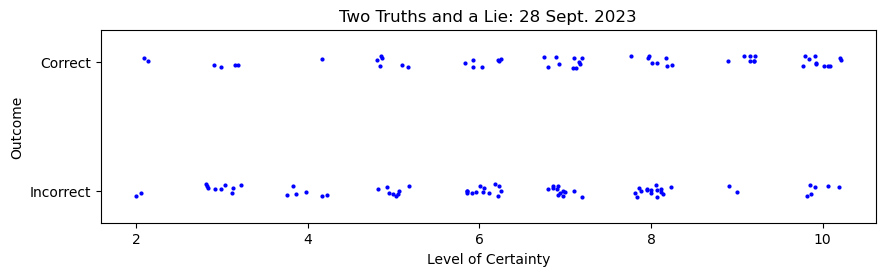

In [8]:
# Generate the small random offsets
maxOffsetX = 0.25
xJitter = np.random.uniform( low=-maxOffsetX, high=maxOffsetX, size=len( certainties ) )

maxOffsetY = 0.05
yJitter = np.random.uniform( low=-maxOffsetY, high=maxOffsetY, size=len( outcomes ) )

# Now plot those puppies
ttaal_fig = plt.figure(figsize=[10,5]) # Makes the figure wider
plt.scatter( certainties + xJitter, outcomes + yJitter, s=4, color="blue" ) # puts dots at the points
plt.title('Two Truths and a Lie: 28 Sept. 2023')
plt.xlabel('Level of Certainty')
plt.ylabel('Outcome')
plt.yticks( ticks=[0.0, 1.0], labels=[ 'Incorrect', 'Correct' ] )

# Set the aspect ratio and the range of the y axis
plt.ylim( -0.25, 1.25 )
ax = plt.gca()
ax.set_aspect( 1.5 )

# Save the plot to a file, then display it here
plt.savefig( "TrueTwoTruthsAndALie_Sep23.pdf" )
plt.show() 